In [153]:
# impport Library
import numpy as np
import pandas as pd


df = pd.read_csv('data/dataset_quiz.csv')

df = df.fillna(0)
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan!

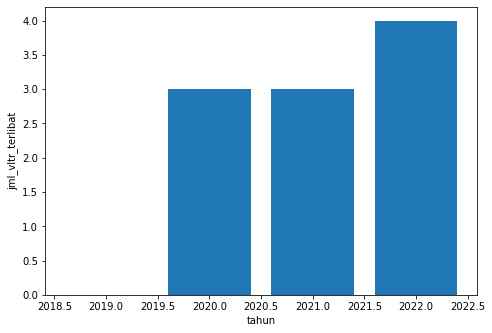

In [154]:
# Bar Plot
import matplotlib.pyplot as plt

%matplotlib inline

# ambil sampel data 10 baris
# df_10= df.head(10)

# Menampilkan Banyaknya Jumlah Volunteer yang Terlibat

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('tahun')
ax.set_ylabel('jml_vltr_terlibat')

ax.bar(df['tahun'],df['jml_vltr_terlibat'])
plt.show()

TIDAK ADA    77
Hak Cipta     8
Name: jenis_luaran_hki, dtype: int64


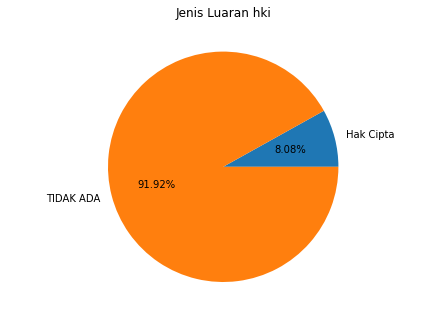

In [155]:
# Pie Plot
import matplotlib.pyplot as plt
import seaborn as sns

# kita group anggota1 berdasarkan jenis luaran hki
dfjenisluaranhki = df.groupby('jenis_luaran_hki').sum()['id_anggota1'].reset_index()
dfjenisluarahki = df['jenis_luaran_hki'].value_counts()
print(dfjenisluarahki)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
plt.title('Jenis Luaran hki')
ax.pie(dfjenisluaranhki['id_anggota1'],labels=dfjenisluaranhki['jenis_luaran_hki'],autopct='%1.2f%%')
plt.show()

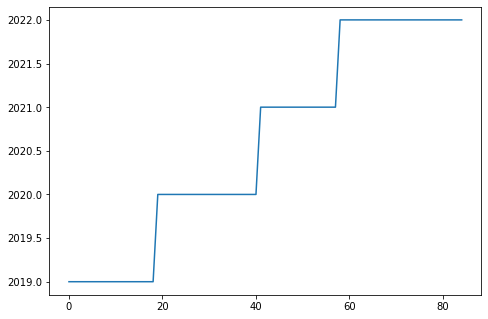

In [156]:
# Line chart
# Menampilkan kenaikan data pertahun

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tahun = df['tahun']
ax.plot(tahun)
plt.show()

TIDAK ADA    77
ADA           8
Name: luaran_hki, dtype: int64


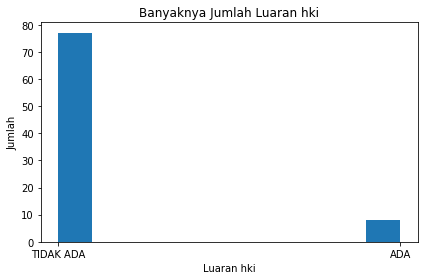

In [157]:
import matplotlib.pyplot as plt

# histogram
# BAnyaknya Jumlah Luaran hki berdasarkan kategori "Ada" dan "Tidak Ada"
plt.hist(x='luaran_hki', data=df)

luaran = df['luaran_hki'].value_counts()
print(luaran)

plt.xlabel('Luaran hki')
plt.ylabel('Jumlah')
plt.title('Banyaknya Jumlah Luaran hki')
plt.tight_layout()
plt.show()



<ipython-input-158-d48787b02616>:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


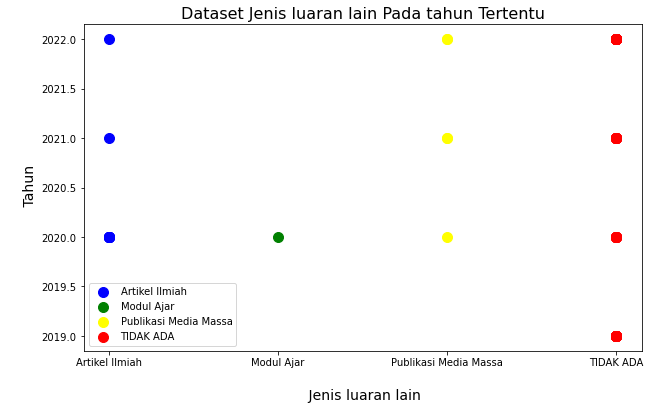

In [158]:
# Scutter plot
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
fig, ax = plt.subplots(figsize=(10, 6))

df_group = df.groupby('jenis_luaran_lain')
colors = {'TIDAK ADA':'red', 'Publikasi Media Massa':'yellow', 'Artikel Ilmiah':'blue', 'Modul Ajar':'green'}

# create scatter plot
for name, group in df_group:
    group.plot(ax=ax, kind='scatter', x='jenis_luaran_lain', y='tahun', label=name, color=colors[name], s=100)

plt.title('Dataset Jenis luaran lain Pada tahun Tertentu', size=16)
plt.xlabel('\n Jenis luaran lain', size=14)
plt.ylabel('\n Tahun', size=14)
plt.show()

2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut!

In [159]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['keterlibatan_vltr']=encoder.fit_transform(df['keterlibatan_vltr'])
# df['keterlibatan_vltr'].head(20)

df['skema']=encoder.fit_transform(df['skema'])
df['luaran_hki']=encoder.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki']=encoder.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki']=encoder.fit_transform(df['potensi_hki'])
df['luaran_lain']=encoder.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain']=encoder.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain']=encoder.fit_transform(df['status_luaran_lain'])

In [160]:
# Seleksi Data

# X = df.iloc[:, 7:]
# y = df['keterlibatan_vltr']

X = df.drop(['keterlibatan_vltr'], axis=1)
y = df['keterlibatan_vltr']

X = pd.get_dummies(X)

X.head()

print(f"Shape dari features adalah {X.shape}, dan shape dari target adalah {y.shape}")

Shape dari features adalah (85, 15), dan shape dari target adalah (85,)


In [161]:
# Mengimport model train_test_split untuk ngesplit sebagian data train menjadi data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)


In [162]:
from sklearn.preprocessing import StandardScaler

# Inisasi obyek StandardScaler
scaler = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [163]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Buat obyek GaussianNB lain
gnb_std = GaussianNB()

# Fit dengan data yang telah di standarisasi
gnb_std.fit(X_train_std, y_train)

# Prediksi dengan data training
y_train_std_pred = gnb_std.predict(X_train_std)

# Evaluasi akurasi training data
acc_train_std = accuracy_score(y_train, y_train_std_pred)

# Prediksi test data yang telah di standarisasi
y_test_std_pred = gnb_std.predict(X_test_std)

# Evaluasi akurasi testing data
acc_test_std = accuracy_score(y_test, y_test_std_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data training terstandarisasi: {acc_train_std}')
print(f'Hasil akurasi data testing terstandarisasi: {acc_test_std}')

Hasil akurasi data training terstandarisasi: 0.9411764705882353
Hasil akurasi data testing terstandarisasi: 1.0


In [164]:
# Melakukan Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Melakukan Prediksi
y_pred = model.predict(X_test)

# Melakukan Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8 0]
 [1 8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.89      0.94         9

    accuracy                           0.94        17
   macro avg       0.94      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [165]:
# # Implementasi k-fold cross validation (random) dengan training dan testing saja
# from sklearn.model_selection import KFold

# # inisiasi obyek kfold
# kf = KFold(n_splits=4)
# print(f'Jumlah fold: {kf.get_n_splits()}')
# print(f'Obyek KFold: {kf}')

# # Lakukan splitting dengan KFold
# kf_split = kf.split(df)
# print(f'Jumlah data df: {df.shape[0]}')

# # cek index data tiap fold
# for train_index, test_index in kf_split:
#     print(f'Index train: {train_index} | Index test: {test_index}')

3. Tentukan data validasi!

In [166]:
# # Split data
# from sklearn.model_selection import train_test_split

# # Split data training dan dan lainnya
# # data lainnya, akan kita split lagi menjadi validasi dan testing.
# # Rasio yang akan kita gunakan adalah 8:1:1
# df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0, stratify=df['keterlibatan_vltr'])

# # Split lagi antara validasi dan testing
# df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0, stratify=df_unseen['keterlibatan_vltr'])

# # Cek masing-masing ukuran data

# print(f'Jumlah data asli: {df.shape[0]}')
# print(f'Jumlah data train: {df_train.shape[0]}')
# print(f'Jumlah data val: {df_val.shape[0]}')
# print(f'Jumlah data test: {df_test.shape[0]}')

# # Cek rasio tiap label
# print('=========')
# print(f'Jumlah label data asli:\n{df.keterlibatan_vltr.value_counts()}')
# print(f'Jumlah label data train:\n{df_train.keterlibatan_vltr.value_counts()}')
# print(f'Jumlah label data val:\n{df_val.keterlibatan_vltr.value_counts()}')
# print(f'Jumlah label data test:\n{df_test.keterlibatan_vltr.value_counts()}')

In [167]:
# Implementasi k-fold cross validation stratified dengan data training, validation, dan testing
from sklearn.model_selection import train_test_split, StratifiedKFold

# Split train test
# Rasio 8:2
df_train2, df_test2 = train_test_split(df, test_size=0.2, random_state=0)

# inisiasi obyek StratifiedKFold
# dengan data df_train2
skf2 = StratifiedKFold(n_splits=4)
print(f'Jumlah fold: {skf2.get_n_splits()}')
print(f'Obyek SKFold: {skf2}')

# Lakukan splitting dengan SKFold
# parameter kedua dari split adalah labelnya
# Split train menjadi train dan validasi
skf2_split = skf2.split(df_train2, df_train2['keterlibatan_vltr'])
print(f'Jumlah data df: {df_train2.shape[0]}')

# cek index data tiap fold
for train_index, test_index in skf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek SKFold: StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 68
Index train: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 31 32 33 35 36 37 39
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 34 38 40]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 34 38 40 50 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test: [31 32 33 35 36 37 39 41 42 43 44 45 46 47 48 49 51]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51] | Index t

Uraian mengenai data validasi

Data validasi terdapat diantara model splitting.
Hasil testing pada model splitting ini adalah rata-rata hasil untuk setiap fold. Besaran spliting data akan ditentukan oleh nilai k-nya. Jika kita menggunakan nilai k=4, maka data akan dibagi menjadi 4 bagian. Salah satu dari bagian tersebut akan menjadi data validasi. Kemudian, untuk setiap iterasi, data validasi akan diganti sesuai dengan jumlah fold.

4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan!

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Klasifikasi Algoritma Decission Tree

# Instantiate DecisionTreeClassifier 'dt' dengan kedalaman maksimum 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Pmemprediksi label set test
y_pred = dt.predict(X_test)
print(y_pred[0:5])

#  menghitung set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' sebagai kriteria informasi
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy kedalam training set
dt_entropy.fit(X_train, y_train)

[1 1 1 1 1]
Test set accuracy: 1.00


DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [169]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)


# menggunakan dt_entropy untuk memprediksi test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# mengevaluasi accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  1.0
Accuracy achieved by using gini:  1.0


In [170]:
# Klasifikasi Algoritma Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisiasi obyek MultinomialNB
gnb = GaussianNB()

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9558823529411765
Hasil akurasi data test: 1.0


In [171]:
# Klasifikasi Algoritma RandomForest

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 0.94
Test set accuracy: 0.9411764705882353


In [172]:
# Melakukan Perbandingan antara KNN dan Random Forest
print('Perbandingan antara Decission, Naive Bayes dan Random Forest : ',(accuracy_score(y_test, y_pred)-accuracy_score(y_test, y_test_pred)-accuracy_score(y_test, y_pred_rf)))

Perbandingan antara Decission, Naive Bayes dan Random Forest :  -0.9411764705882353


5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

Root Mean Square Error (RMSE) merupakan besarnya tingkat kesalahan hasil prediksi, dimana semakin kecil (mendekati 0) nilai RMSE maka hasil prediksi akan semakin akurat.

In [173]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error

# # Instantiate dt
# dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# # Fit dt kedalam the training set
# dt.fit(X_train, y_train)

# # Compute y_pred
# y_pred = dt.predict(X_test)

# # Compute mse_dt
# mse_dt = mean_squared_error(y_test, y_pred)

# # Compute rmse_dt
# rmse_dt = mse_dt ** (1/2)

# # Print rmse_dt
# print("Test set RMSE dt: {:.2f}".format(rmse_dt))

In [174]:
# Melakukan Metode Prediksi Keterlibatan Volunter berdasrkan Tahun dengan Klasifikasi Naive Bayes

tahun = 2022
prediksi = df[df['tahun'] == tahun]
prediksi = prediksi.drop(['keterlibatan_vltr'], axis=1)

prediksi = scaler.transform(prediksi)
prediksi = gnb.predict(prediksi)

# Menampilkan Hasil Prediksi dan decode prediksi
print('Prediksi Keterlibatan Volunter pada Tahun',tahun,'adalah',encoder.inverse_transform(prediksi))

# Hitung Akurasi Prediksi
from sklearn.metrics import accuracy_score
print('Akurasi Prediksi : ',accuracy_score(y_test, y_test_pred))

Prediksi Keterlibatan Volunter pada Tahun 2022 adalah ['Draft' 'Draft' 'TIDAK ADA' 'TIDAK ADA' 'TIDAK ADA' 'TIDAK ADA'
 'TIDAK ADA' 'Draft' 'Draft' 'Draft' 'TIDAK ADA' 'Draft' 'Draft' 'Draft'
 'TIDAK ADA' 'TIDAK ADA' 'TIDAK ADA' 'Draft' 'TIDAK ADA' 'TIDAK ADA'
 'TIDAK ADA' 'TIDAK ADA' 'TIDAK ADA' 'TIDAK ADA' 'TIDAK ADA' 'TIDAK ADA'
 'Draft']
Akurasi Prediksi :  1.0


6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4!

In [175]:
# Matric Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # prediksi

print('Confusion Matrix Decision Tree : ', confusion_matrix(y_test, y_pred)) 


Confusion Matrix Decision Tree :  [[8 0]
 [0 9]]


<ipython-input-176-d6b6cf305302>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


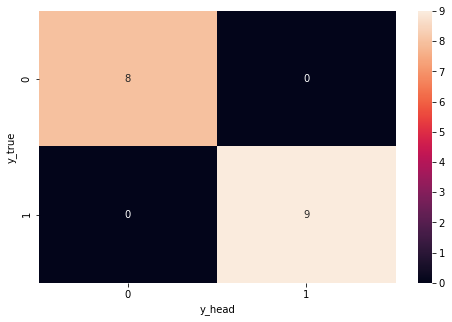

In [176]:
# Visualisasi Confusion Matrix 
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [177]:
from sklearn.naive_bayes import GaussianNB

# Matric Naive Bayes
model2 = GaussianNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test) # prediksi

print('Confusion Matrix Naive Bayes : ',confusion_matrix(y_test, y_test_pred)) 

Confusion Matrix Naive Bayes :  [[8 0]
 [0 9]]


<ipython-input-178-dea192326cf5>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


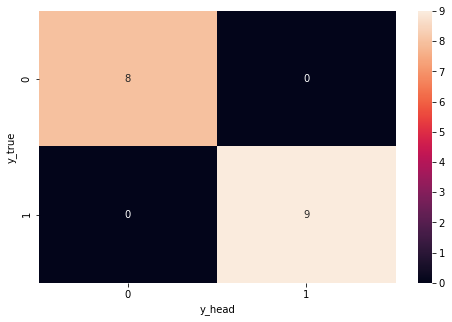

In [178]:
# Visualisasi Confusion Matrix 
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

ROC Curve

In [179]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

print('ROC Decission Tree : ',roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

ROC Decission Tree :  1.0


In [180]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_test_pred))

print('ROC Decission Tree : ',roc_auc_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

ROC Decission Tree :  1.0


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

<ipython-input-182-cd097cc26ebd>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


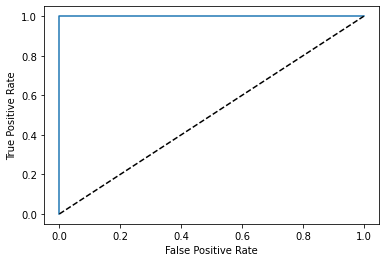

In [182]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

<ipython-input-183-b197d55c4682>:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


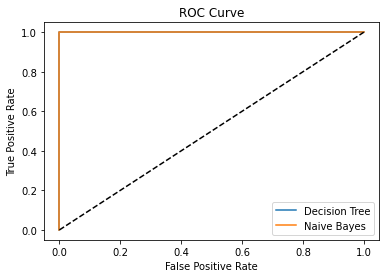

In [183]:
# ROC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='Decision Tree')
plt.plot(fpr2, tpr2, label='Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [184]:
# from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn import svm
# from sklearn.model_selection import train_test_split


# classifier = svm.SVC(probability=True)
# classifier.fit(X_train, y_train)

In [185]:
# X = df.drop(['keterlibatan_vltr'], axis=1)
# y = df['keterlibatan_vltr']

In [186]:
# #Menghitung prediction probability dari model yang telah dibuat
# svm_probs = classifier.predict_proba(X_test)
 
# #Prediction probability berisi '0'
# random_probs = [0 for _ in range(len(y_test))]

In [187]:
# svm_probs = svm_probs[:,1]

In [188]:
# #menghitung AUC untuk random model
# random_auc = roc_auc_score(y_test, random_probs)
 
# #menghitung AUC SVM classifier
# svm_auc = roc_auc_score(y_test, svm_probs)
 
# #menampilkan hasil
# print('Random Prediction : AUCROC = %.3f' % (random_auc))
# print('SVM : AUCROC = %.3f' % (svm_auc))

In [189]:
# #menyimpan nilai yang dibutuhkan untuk membuat ROC curve (false positive rate, true positive rate)
# random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
# svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
 
# #plot ROC curve dengan matplotlib.pyplot
# plt.plot(random_fpr, random_tpr, marker='.', label='Random : (AUCROC = %.3f)' % random_auc)
# plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM : (AUCROC = %.3f)' % svm_auc)
 
# plt.title('ROC Plot')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.show()

7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC  # "Support Vector Classifier"

In [191]:
# from sklearn.model_selection import RepeatedKFold

# # inisiasi repated k-fold
# cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

In [192]:
# Grid Search
params = {
   'criterion': ['gini', 'entropy', 'log_loss'],
   'max_depth': list(range(5,10))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
grid = GridSearchCV(model, param_grid=params, cv=skf2)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit grid.fit(X, y)

# Evaluasi dengan score
score = grid.score(X, y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

250 ms ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'entropy', 'max_depth': 5}


In [193]:
# Random Search
params = {
       'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,10))
}

# inisiasi grid berdasarkan nilai repeated k-fold dan hyperparameter
rs = RandomizedSearchCV(model, param_distributions=params, cv=skf2,
                        n_iter=10, scoring="accuracy", n_jobs=-1, return_train_score=True)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit rs.fit(X, y)

# Evaluasi dengan score
score = rs.score(X, y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {rs.best_params_}')

82.9 ms ± 4.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 7, 'criterion': 'log_loss'}


In [194]:
# Exchived Search

# Setelah melakukan beberapa percobaan kombinasi hyperparameter,
# hasil evaluasi terbaik didapatkan dengan konfigurasi hyperparameter sebagai berikut
ms = SVC(kernel="linear", C=100)

# Fit / latih berdasarkan random
# %timeit merupakan magic command didalam ipython notebook
# yang dapat kita gunakan untuk menghitung waktu komputasi
# cara ini cukup efektif untuk melakukan evaluasi suatu algoritma atau prosedur

%timeit ms.fit(X, y)

# Evaluasi dengan score
score = ms.score(X, y)

print(f'Hasil evaluasi: {score}')

# Menggunakan hyperparameter gamma dan kernel rbf
msg = SVC(kernel="rbf", C=100, gamma=0.001)

%timeit msg.fit(X, y)
score = msg.score(X, y)

print(f'Hasil evaluasi dengan gamma: {score}')

1.09 s ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 0.9647058823529412
2.81 ms ± 485 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Hasil evaluasi dengan gamma: 1.0


8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)!

<ipython-input-204-f122f6af0ea1>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


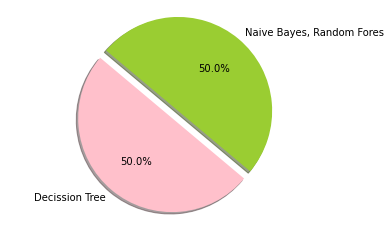

In [204]:
# Membuat Visualisasi Perbandingan antara Decision Tree dan Naive Bayes
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Decission Tree', 'Naive Bayes'
sizes = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_test_pred)]
colors = ['pink', 'yellowgreen', ]
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()



<ipython-input-206-110ed6598b85>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


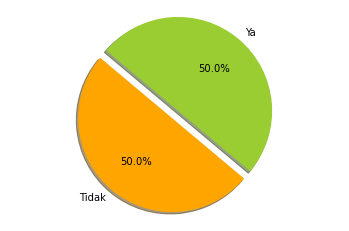

In [206]:

# Visualisasi Hasil Prediksi
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Tidak', 'Ya'
sizes = [accuracy_score(y_test, y_test_pred), accuracy_score(y_test, y_test_pred)]
colors = ['orange', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()